# Desarrollo

In [2]:
# ACTIVIDAD 2 <a class="anchor" id="Actividad2"></a>

## Preguntas:
* [a](#a)
* [b](#b)
* [c](#c)
* [d](#d)
* [e](#e)
* [f](#f)
* [g](#g)
* [h](#h)
* [i](#i)
* [j](#j)
* [k](#k)
* [l](#l)
* [m](#m)
* [n](#n)
* [o](#o)
* [p](#p)
* [q](#p)
* [r](#p)
* [s](#s)
* [t](#t)
* [u](#u)
* [v](#v)
* [Actividad 2](#Actividad2)

Cargar datos y agregar columna a predecir. Se elimina la ultima fila ya que no tiene valor a predecir

In [3]:
import pandas as pd
df = pd.read_csv("DailyDelhiClimateTrain.csv")
df["y_value"] = df["meantemp"].shift(-1)
df = df.iloc[:-1] #remove last row

In [4]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,y_value
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,7.400000
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,7.166667
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,8.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,6.000000
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,7.000000


Extracción de información a partir de la fecha

In [5]:
...#procesamiento de fecha(datetime/timestamp) a numeros
df["date"] = pd.to_datetime(df["date"])
df['cday'] = df['date'].dt.dayofweek #0:lunes,6:domingo
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month #1:enero, 12: diciembre
...#based on: https://en.wikipedia.org/wiki/Climate_of_India
seasons = ["winter","winter","summer","summer","summer","rainy","rainy","rainy","fall","fall","fall","winter"]
df['season'] = [ seasons[month_i - 1] for month_i in df['month'].values ]
df = pd.get_dummies(df,columns=['season']) #to one hot.. as nominal variable
... #any more information?
df.drop(["date"], axis=1, inplace=True) #delete date

Matrices de entrenamiento con alietoriedad en training set para evitar orden natural

In [6]:
y = df.pop("y_value").values
X = df.values 
X_train = X[:1000]
y_train = y[:1000]
X_val = X[1000:]
y_val = y[1000:]
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=0) #shuffle values on train only

# a)<a class="anchor" id="a"></a>

In [7]:
df

,meantemp,humidity,wind_speed,meanpressure,cday,year,month,season_fall,season_rainy,season_summer,season_winter
0,10.000000,84.500000,0.000000,1015.666667,1,2013,1,0,0,0,1
1,7.400000,92.000000,2.980000,1017.800000,2,2013,1,0,0,0,1
2,7.166667,87.000000,4.633333,1018.666667,3,2013,1,0,0,0,1
3,8.666667,71.333333,1.233333,1017.166667,4,2013,1,0,0,0,1
4,6.000000,86.833333,3.700000,1016.500000,5,2013,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1456,16.850000,67.550000,8.335000,1017.200000,1,2016,12,0,0,0,1
1457,17.217391,68.043478,3.547826,1015.565217,2,2016,12,0,0,0,1
1458,15.238095,87.857143,6.000000,1016.904762,3,2016,12,0,0,0,1
1459,14.095238,89.666667,6.266667,1017.904762,4,2016,12,0,0,0,1


El problema a resolver es el de predecir la temperatura media de un dia basandonos en caracteristicas del clima del dia anterior. Para ello contamos con datos de la ciudad de Dehli de India que se comportan de la siguiente forma

In [8]:
import matplotlib.pyplot as plt
import numpy as np

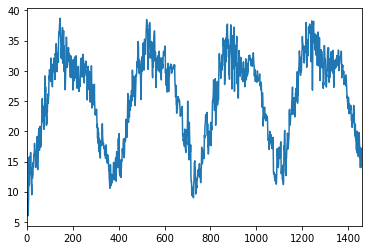

In [9]:
df["meantemp"].plot()

Se pueden apreciar 4 peaks de temperaturas altas y bajas que porbablemente corresponden con fechas en temporadas de verano e invierno respectivamente, por lo que las temperaturas intermedias entre estos peaks corresponderian a fechas de temporadas de otoño y primavera

In [10]:
#df["month"].unique()

In [11]:
#df["year"].unique()

In [12]:
xt = []
for i in df["year"].unique():
    for j in df["month"].unique():
        xt.append(str(i)+"/"+str(j))

([<matplotlib.axis.XTick at 0x132caa054a8>,
 <a list of 48 Text xticklabel objects>)

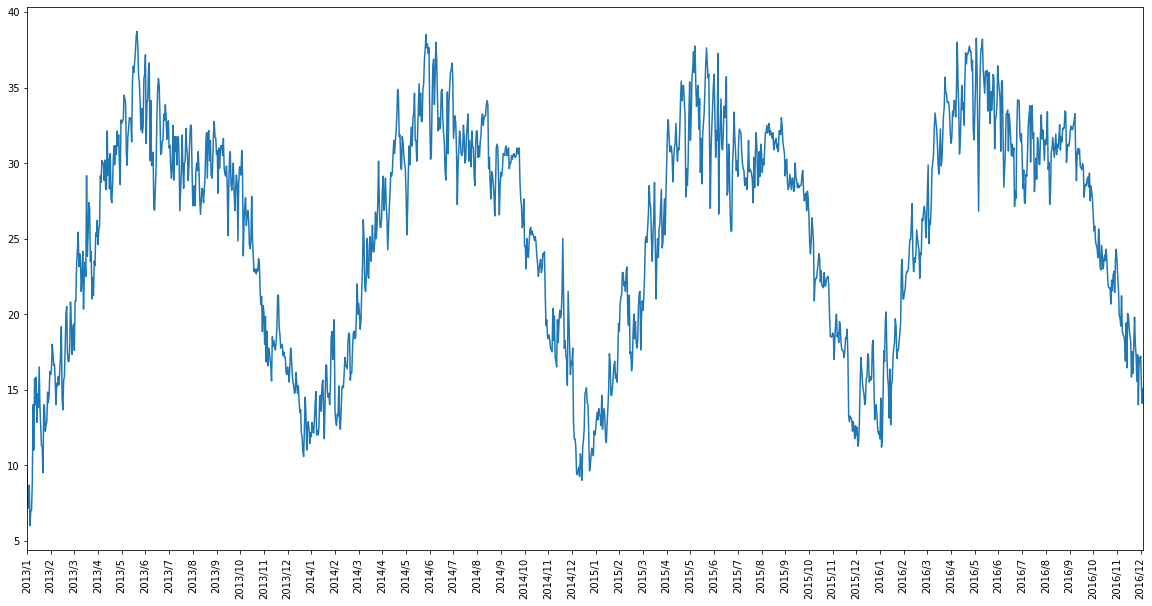

In [13]:
plt.figure(figsize=(20,10))
df["meantemp"].plot()
plt.xticks(np.arange(0, 1461, step=31), xt, rotation=90) #steps de 31 por separacion entre meses


([<matplotlib.axis.XTick at 0x132caaf62e8>,
 <a list of 48 Text xticklabel objects>)

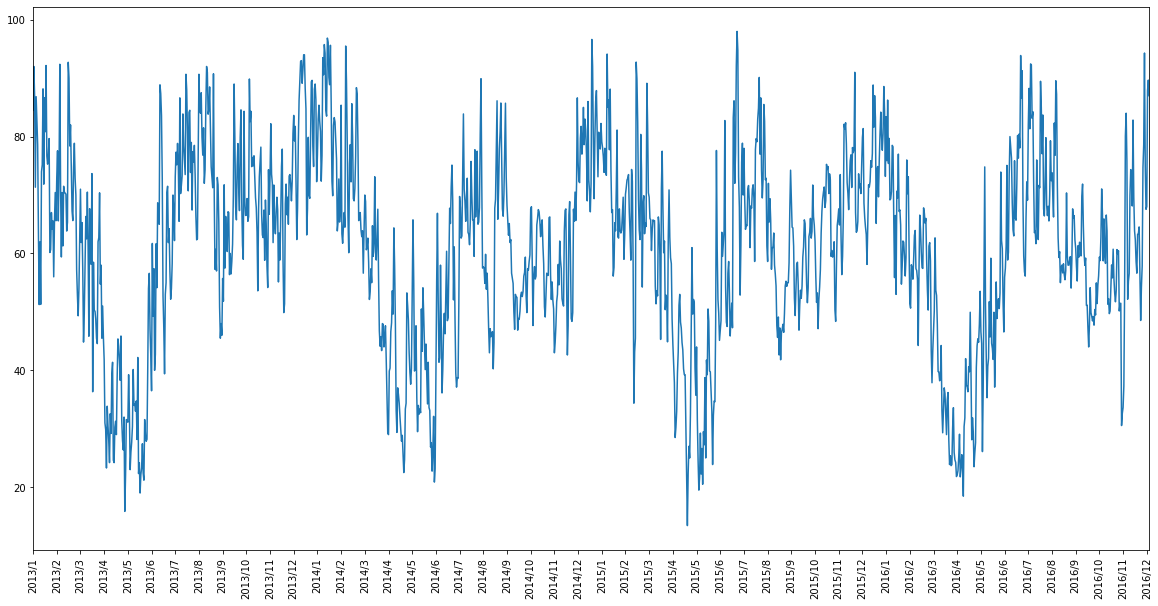

In [14]:
plt.figure(figsize=(20,10))
df["humidity"].plot()
plt.xticks(np.arange(0, 1461, step=31), xt, rotation=90)


([<matplotlib.axis.XTick at 0x132cabbcfd0>,
 <a list of 48 Text xticklabel objects>)

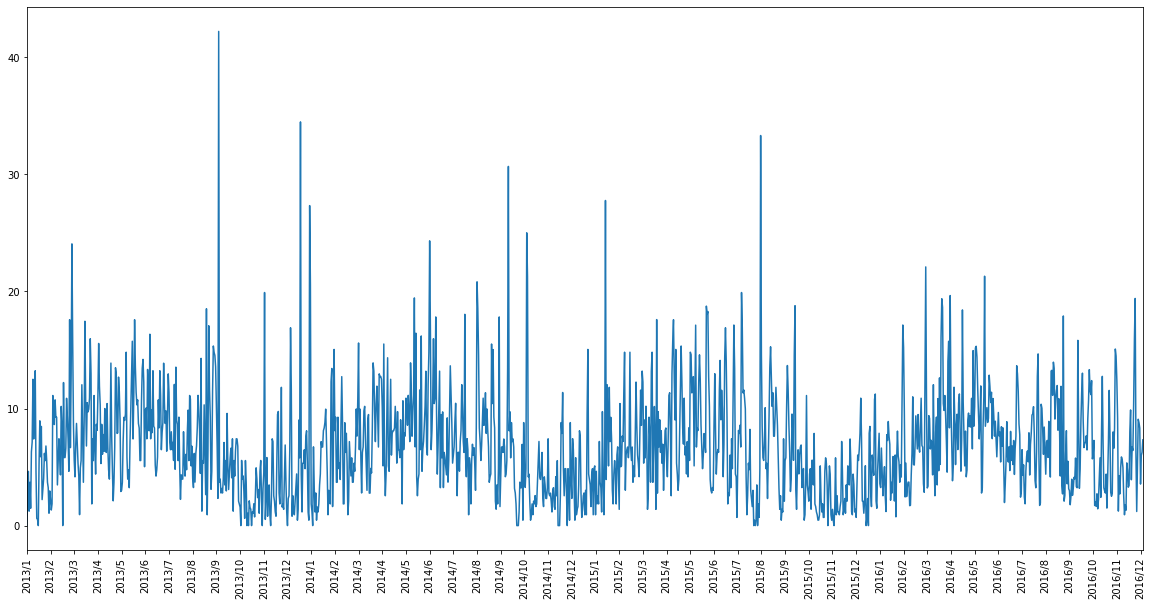

In [15]:
plt.figure(figsize=(20,10))
df["wind_speed"].plot()
plt.xticks(np.arange(0, 1461, step=31), xt, rotation=90)


([<matplotlib.axis.XTick at 0x132cb64a438>,
 <a list of 48 Text xticklabel objects>)

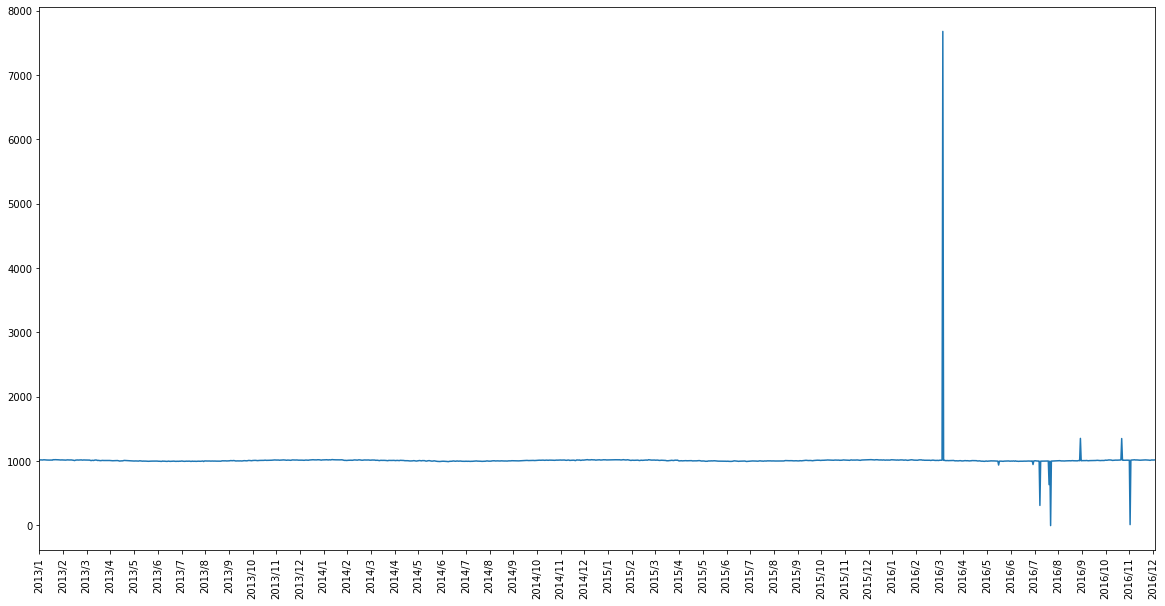

In [16]:
plt.figure(figsize=(20,10))
df["meanpressure"].plot()
plt.xticks(np.arange(0, 1461, step=31), xt, rotation=90)


Es posible apreciar que la presion media se mantiene constante a lo largo de los años hasta llegar al verano del 2015 donde se produce un peak de temperatura inesperado. Dicho peak, y los posteriores, pueden ser un outliers de los cuales hay que preocuparse al momento de realizar el entrenamiento del modelo mas adelante

Utilizar la informacion del dia anterior puede no ser suficiente para predecir la del dia siguiente dado que existen variaciones muy bruscas de temperaturas entre algunos dias, sobre todo cuando se produce el cambio de estaciones. Esto puede apreciarse por ejemplo en el periodo de abril-mayo del 2013, por lo que es probable que se requiera informacion historica para realizar la predicción

# b) <a class="anchor" id="b"></a>

In [17]:
import numpy as np
def RMSE(ytrue,ypred):
    return np.sqrt(np.mean(np.square(ytrue - ypred)) )
from sklearn.tree import DecisionTreeRegressor as Tree
model_unr = Tree() #unregularized model -- default parameters
model_unr.fit(X_train,y_train)
... #define your regularized tree model

Ellipsis

In [18]:
model_r = Tree(max_depth = 10, min_samples_split = 7)
model_r.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

La ventaja del decision tree en este problema viene dada por el numero de dimensiones que se consideran, ya que al aumentar el numero de dimensiones el problema se vuelve NP-Hard y por tanto tomaria demasiado tiempo su ejecucion.

La ventaja en el escalado se produce debido a que el arbol no realiza ajustes de peso como por ejemplo lo hace un regresor logistico y por lo tanto no se ve influenciado por la magnitud de los datos.

# c) <a class="anchor" id="c"></a>

### No Regularizado

RMSE train=  0.0
RMSE val=  2.4207556416951572


<Figure size 1440x720 with 0 Axes>

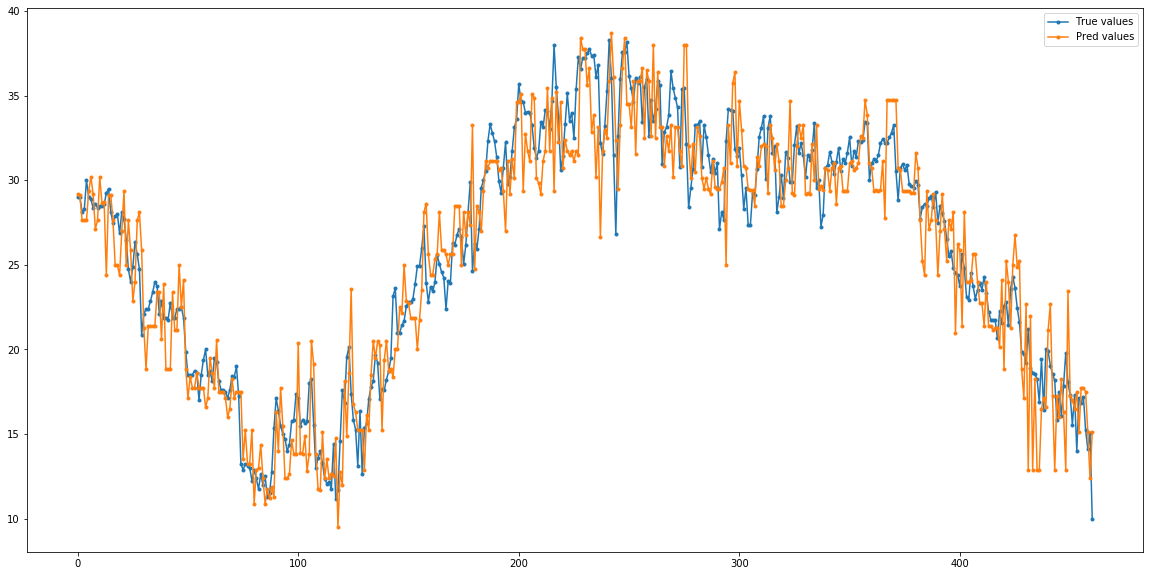

In [19]:
plt.figure(figsize=(20,10))
y_train_hat = model_unr.predict(X_train)
y_val_hat = model_unr.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_hat, '.-' ,label="Pred values")
plt.legend()
plt.show()

### Regularizado

RMSE train=  0.9755999038504851
RMSE val=  2.228770678294849


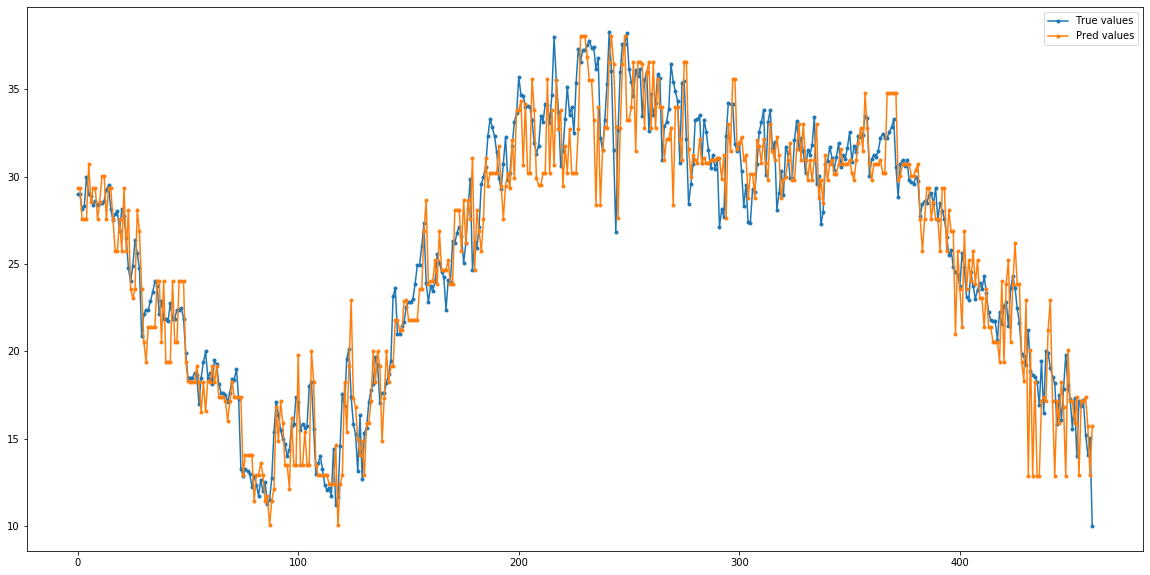

In [20]:
y_train_hat = model_r.predict(X_train)
y_val_hat = model_r.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_hat, '.-' ,label="Pred values")
plt.legend()
plt.show()

Se puede apreciar en ambos tipos de modelos que no hay una variacion muy grande respeco al RMSE y en cuanto a lo observable en los graficos, el desempeño se aprecia diferente en ciertos puntos donde el modelo no regularizado obtiene mejores resultados y otros donde el regularizado se comporta mejor. Pero en general el desempeño del regularizado es mejor ya que si bien ambos se equivocan practicamente en los mismas predicciones, la distancia de la prediccion con respecto al valor real en el modelo regularizado es menor que en el caso no regularizado.

Puede ser que al variar los parametros del modelo regularizado se obtenga una diferencia mas notoria

RMSE train=  1.183861477354968
RMSE val=  1.980054534825134


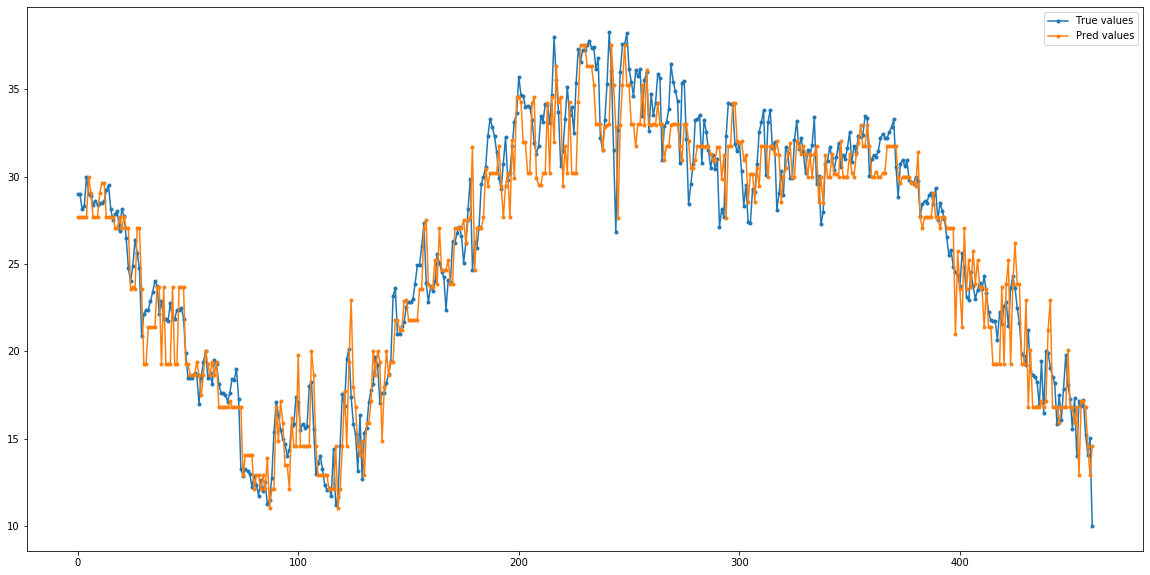

In [21]:
model_r = Tree(max_depth = 25, min_samples_split = 20)
model_r.fit(X_train, y_train)
y_train_hat = model_r.predict(X_train)
y_val_hat = model_r.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_hat, '.-' ,label="Pred values")
plt.legend()
plt.show()

En esta caso, donde se aumento la altura y la cantidad minima de datos para una separacion, se logra apreciar una disminucion considerable en el RMSE del validation set. Asi mismo se aprecia en el grafico donde es posible observar que donde antes exisitan distancias grandes entre valor real y la prediccion, ahora estas distancias son menos notorias.

# d)  Bagging<a class="anchor" id="d"></a>

## No Regularizado

In [34]:
from sklearn.ensemble import BaggingRegressor
model_unr = BaggingRegressor(base_estimator=Tree(),n_estimators=25, n_jobs=-1)
model_unr.fit(X_train, y_train)
y_train_hat = model_unr.predict(X_train)
y_val_hat = model_unr.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))

RMSE train=  0.678492574775359
RMSE val=  1.6918401982888112


## Regularizado

In [35]:
model_r = BaggingRegressor(base_estimator=Tree(max_depth = 25, min_samples_split = 20), n_estimators = 25, n_jobs=-1)
model_r.fit(X_train, y_train)
y_train_hat = model_r.predict(X_train)
y_val_hat = model_r.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))

RMSE train=  1.2412085823479773
RMSE val=  1.6225103570290775


In [33]:
rmse_tr_list=[]
rmse_te_list=[]
for i in range(25):
    model_r = BaggingRegressor(base_estimator=Tree(max_depth = 25, min_samples_split = 20), n_estimators = i+1, n_jobs=-1)
    model_r.fit(X_train, y_train)
    y_train_hat = model_r.predict(X_train)
    y_val_hat = model_r.predict(X_val)
    rmse_tr_list.append(RMSE(y_train,y_train_hat))
    rmse_te_list.append(RMSE(y_val,y_val_hat))

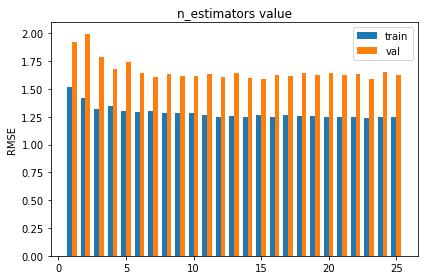

In [53]:


fig, ax = plt.subplots()

rects1 = ax.bar(np.arange(1,26) - 0.35/2, rmse_tr_list, 0.35, label='train')
rects2 = ax.bar(np.arange(1,26) + 0.35/2, rmse_te_list, 0.35, label='val')
ax.legend()
ax.set_ylabel('RMSE')
ax.set_title('n_estimators value')
ax.legend()


fig.tight_layout()
plt.show()

Es posible notar que el overfitting se produce en el modelo no regularizado donde el RMSE para el training set es bajo en comparacion al del val set.

Si observamos el grafico es posible notar que para un numero bajo de estimadores la diferencia entre el RMSE de train y de validation es considerablemente mayor que para valores mas altos donde dicha diferencia parece converger a un valor de 0.5 (RMSE_train aprox. de 1.25 y RMSE_val aprox. 1.75)

# e) AdaBoost<a class="anchor" id="e"></a>

In [54]:
from sklearn.ensemble import AdaBoostRegressor
model_unr = AdaBoostRegressor(base_estimator=Tree(), n_estimators=25)
model_unr.fit(X_train, y_train)
y_train_hat = model_unr.predict(X_train)
y_val_hat = model_unr.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))

RMSE train=  0.0869672068542345
RMSE val=  1.7868777779975624


In [55]:
model_r = AdaBoostRegressor(base_estimator=Tree(max_depth = 25, min_samples_split = 20), n_estimators=25)
model_r.fit(X_train, y_train)
y_train_hat = model_r.predict(X_train)
y_val_hat = model_r.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))

RMSE train=  0.8329678600574324
RMSE val=  1.7122353136259323


AdaBoost utiliza la tecnica de pesar ejemplos donde se ajustan los pesos de la instancia de acuerdo al error de la prediccion actual. Esto puede ser la razon por la cual en el modelo no regularizado existe un overfitting considerable si observamos los RMSE obtenidos.

In [58]:
rmse_tr_list=[]
rmse_te_list=[]
for i in range(25):
    model_r = AdaBoostRegressor(base_estimator=Tree(max_depth = 25, min_samples_split = 20), n_estimators = i+1)
    model_r.fit(X_train, y_train)
    y_train_hat = model_r.predict(X_train)
    y_val_hat = model_r.predict(X_val)
    rmse_tr_list.append(RMSE(y_train,y_train_hat))
    rmse_te_list.append(RMSE(y_val,y_val_hat))

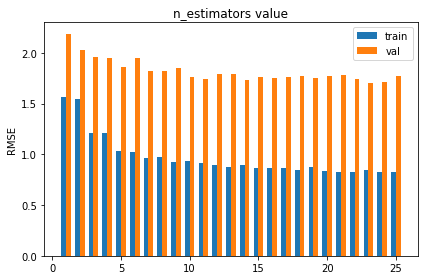

In [59]:
fig, ax = plt.subplots()

rects1 = ax.bar(np.arange(1,26) - 0.35/2, rmse_tr_list, 0.35, label='train')
rects2 = ax.bar(np.arange(1,26) + 0.35/2, rmse_te_list, 0.35, label='val')
ax.legend()
ax.set_ylabel('RMSE')
ax.set_title('n_estimators value')
ax.legend()


fig.tight_layout()
plt.show()

En este grafico se puede observar que la diferencia entre RMSE entre train y val set es mucho mas notorio que en el caso anteorior donde se utilizo la tecnica de Bagging